<a href="https://colab.research.google.com/github/DadaNanjesha/CASE_STUDY_MODEL_ENGINEERING/blob/main/casestudymodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


In [5]:
# Load a subset of the data for faster prototyping
excel_file_path = "PSP_Jan_Feb_2019.xlsx"
data = pd.read_excel(excel_file_path).sample(frac=0.1, random_state=42)


In [ ]:
# Preliminary Data Exploration
print("Preliminary Data Exploration:")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

In [11]:
# Display the first few rows of the dataset

data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
5087,5087,2019-01-05 14:06:04,Austria,215,0,UK_Card,0,Master
22530,22530,2019-01-27 04:44:57,Germany,240,0,Simplecard,0,Diners
15518,15518,2019-01-17 20:30:02,Switzerland,382,0,UK_Card,1,Master
3418,3418,2019-01-03 21:01:04,Germany,32,0,UK_Card,1,Master
36168,36168,2019-02-11 08:20:46,Austria,211,0,UK_Card,0,Master


In [12]:
# Check for Duplicate Rows
duplicates = data[data.duplicated()]
print(f"\nNumber of Duplicate Rows: {duplicates.shape[0]}")



Number of Duplicate Rows: 0


In [13]:
# Data Understanding
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5041 entries, 5087 to 29985
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  5041 non-null   int64         
 1   tmsp        5041 non-null   datetime64[ns]
 2   country     5041 non-null   object        
 3   amount      5041 non-null   int64         
 4   success     5041 non-null   int64         
 5   PSP         5041 non-null   object        
 6   3D_secured  5041 non-null   int64         
 7   card        5041 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 354.4+ KB


In [14]:
data.describe()

,Unnamed: 0,amount,success,3D_secured
count,5041.000000,5041.000000,5041.000000,5041.000000
mean,25186.831978,203.822853,0.180321,0.232692
std,14551.866454,94.914591,0.384493,0.422589
min,4.000000,6.000000,0.000000,0.000000
25%,12593.000000,135.000000,0.000000,0.000000
50%,25648.000000,203.000000,0.000000,0.000000
75%,37562.000000,268.000000,0.000000,0.000000
max,50398.000000,630.000000,1.000000,1.000000


In [23]:
# Data Quality Measurements
data_quality = {
    'Null Values': data.isnull().sum(),
    'Unique Values': data.nunique(),
    'Summary Statistics': data.describe()
}
# Display Data Quality Measurements
for metric, value in data_quality.items():
    print(f"\n{metric}:\n{value}")


Null Values:
Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

Unique Values:
Unnamed: 0    5041
tmsp          5035
country          3
amount         450
success          2
PSP              4
3D_secured       2
card             3
dtype: int64

Summary Statistics:
         Unnamed: 0       amount      success   3D_secured
count   5041.000000  5041.000000  5041.000000  5041.000000
mean   25186.831978   203.822853     0.180321     0.232692
std    14551.866454    94.914591     0.384493     0.422589
min        4.000000     6.000000     0.000000     0.000000
25%    12593.000000   135.000000     0.000000     0.000000
50%    25648.000000   203.000000     0.000000     0.000000
75%    37562.000000   268.000000     0.000000     0.000000
max    50398.000000   630.000000     1.000000     1.000000


In [25]:

missing_data_counts = data.isnull().sum()
print(missing_data_counts)

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


Total number of Transactions : 5041
Transaction Status Failed: 4132
Transaction Status success: 909


<ipython-input-26-9c72249eee4a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


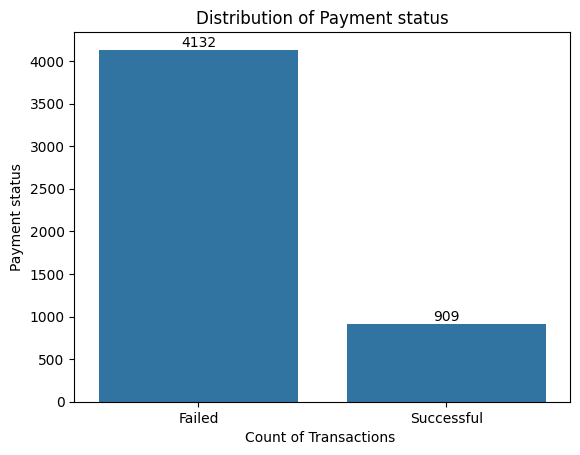

In [26]:
# Visualize success distribution
print(f"Total number of Transactions : {data['success'].count()}")
print(f"Transaction Status Failed: {data['success'].isin([0]).sum(axis=0)}")
print(f"Transaction Status success: {data['success'].isin([1]).sum(axis=0)}")
ax = sns.countplot(x='success', data=data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of Payment status")
labels = ['Failed', 'Successful']
ax.set_xticklabels(labels)
plt.xlabel("Count of Transactions ")
plt.ylabel("Payment status")
plt.show()

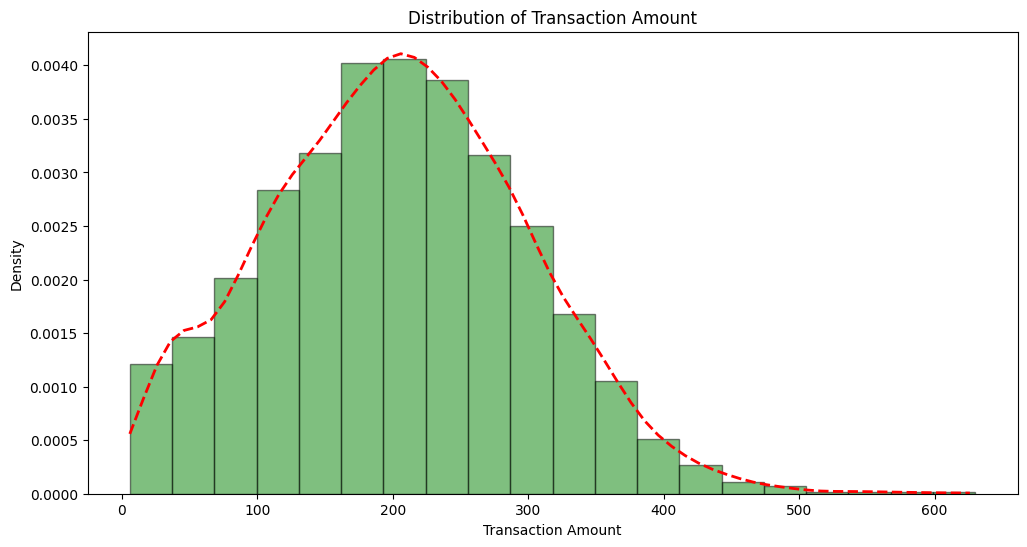

In [39]:
# Distribution of Amount
plt.figure(figsize=(12, 6))
plt.hist(data['amount'], bins=20,color='green', edgecolor='black', density=True, alpha=0.5)
kde = gaussian_kde(data['amount'])
x_vals = range(int(min(data['amount'])), int(max(data['amount'])), 10)
plt.plot(x_vals, kde(x_vals), color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

<ipython-input-28-4c1fc0189890>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


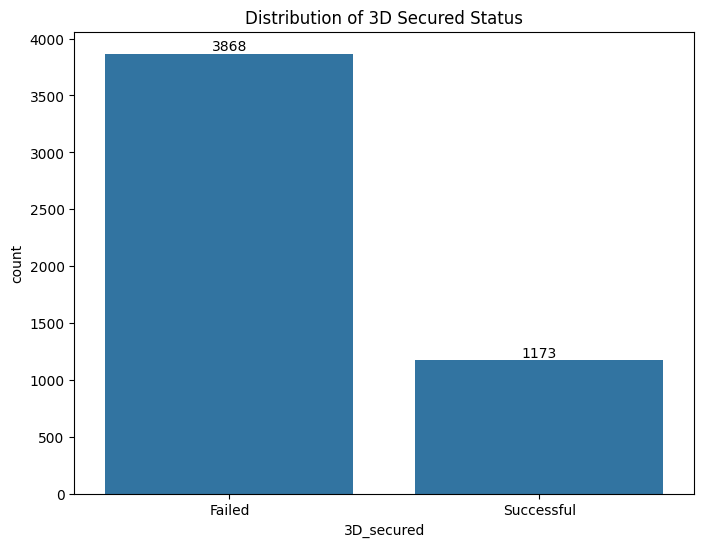

In [28]:

# Distribution of 3D Secured Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='3D_secured', data=data)
ax.bar_label(ax.containers[0])
plt.title("Distribution of 3D Secured Status")
labels = ['Failed', 'Successful']
ax.set_xticklabels(labels)
plt.show()

In [29]:
# Data Preprocessing
data['timestamp_numeric'] = (data['tmsp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
data = data.drop(['tmsp', 'country', 'PSP', 'card'], axis=1)
data['timestamp_numeric'] = data['timestamp_numeric'].astype('int32')


In [30]:
# Modeling
X = data.drop("success", axis=1)
y = data["success"]


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"RandomForestClassifier, {round(baseline_accuracy, 4)}")


RandomForestClassifier, 0.782


In [33]:
# Advanced predictive model XGBClassifier
advanced_model = XGBClassifier(random_state=42)
advanced_model.fit(X_train, y_train)
advanced_predictions = advanced_model.predict(X_test)
advanced_accuracy = accuracy_score(y_test, advanced_predictions)
print(f"XGBClassifier, {round(advanced_accuracy, 4)}")


XGBClassifier, 0.8008


In [34]:
# Advanced predictive model GradientBoostingClassifier
advanced_model = GradientBoostingClassifier(random_state=42)
advanced_model.fit(X_train, y_train)
advanced_predictions = advanced_model.predict(X_test)
advanced_accuracy = accuracy_score(y_test, advanced_predictions)
print(f"GradientBoostingClassifier, {round(advanced_accuracy, 4)}")


GradientBoostingClassifier, 0.8285


In [35]:
# Advanced predictive model
advanced_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
advanced_model.fit(X_train, y_train)
advanced_predictions = advanced_model.predict(X_test)
advanced_accuracy = accuracy_score(y_test, advanced_predictions)
print(f"Advanced predictive RandomForestClassifier, {round(advanced_accuracy, 4)}")


Advanced predictive RandomForestClassifier, 0.8345


In [36]:
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
# Advanced predictive model RandomizedSearchCV
advanced_model = RandomizedSearchCV(advanced_model, param_distributions, random_state=42)
advanced_model.fit(X_train, y_train)
advanced_predictions = advanced_model.predict(X_test)
advanced_accuracy = accuracy_score(y_test, advanced_predictions)
print(f"RandomizedSearchCV, {round(advanced_accuracy, 4)}")


RandomizedSearchCV, 0.8404


In [37]:
# Error analysis
conf_matrix = confusion_matrix(y_test, advanced_predictions)
print("\nError Analysis:")
print("Confusion Matrix:")
print(conf_matrix)


Error Analysis:
Confusion Matrix:
[[848   2]
 [159   0]]


In [38]:
# Additional Metrics
accuracy = accuracy_score(y_test, advanced_predictions)
precision = precision_score(y_test, advanced_predictions, average='weighted')
recall = recall_score(y_test, advanced_predictions, average='weighted')
f1_score = f1_score(y_test, advanced_predictions, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")



Accuracy: 0.8404
Precision: 0.7094
Recall: 0.8404
F1 Score: 0.7694
